# Sect 35: Big Data in PySpark + Using Docker

- online-ds-pt-041320
- 10/14/20



# Spark Machine learning 

### Learning goals:

- Learn what Big Data is and the complications/complexities of working with it 

- align the relationships between Hadoop, Spark, and Databricks
- differentiate between Spark RDDs and Spark Dataframes and when each is appropriate
- locate and explore the Spark.ML documentation
- code along a text classification problem using four different ml algorithms, a data prep pipeline, and gridsearch to fine tune a model

# Intro to Big Data

## What is Big Data?

This leads us to the most widely used definition in the industry by Gartner: 


>***Big data is high-volume, high-velocity and/or high-variety information assets that demand cost-effective, innovative forms of information processing that enable enhanced insight, decision making, and process automation***.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-big-data-introduction-online-ds-ft-100719/master/images/3_components.png" width=40%$>

### Velocity
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-big-data-introduction-online-ds-ft-100719/master/images/internet_minute.jpg" width=40%>

### Variety
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-big-data-introduction-online-ds-ft-100719/master/images/unstructured_data.png" width=40%>

## Big Data Analytics

The key activities associated with big data analytics are reflected in four main areas: 

- Big data warehousing and distribution
- Big data storage
- Big data computational platforms
- Big data analyses, visualization, and evaluation

Such a framework can be applied for knowledge discovery and informed decision-making in big data-driven organizations.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-big-data-introduction-online-ds-ft-100719/master/images/tech_stack.png">

## Parrallel & Distributed Computing

- MapReduce is a programming paradigm that enables the ability to scale across hundreds or thousands of servers for big data analytics. 


> *In a nutshell, the term "MapReduce" refers to two distinct tasks. The first is the __Map__ job, which takes one set of data and transforms it into another set of data, where individual elements are broken down into tuples __(key/value pairs)__, while the __Reduce__ job takes the output from a map as input and combines those data tuples into a smaller set of tuples.*


- The MapReduce programming paradigm is designed to allow __parallel and distributed processing__  of large sets of data (also known as big data). MapReduce allows us to convert such big datasets into sets of __tuples__ as __key:value__ pairs,


- Somehow, all data can be mapped to **key:value** pairs 
- Keys and values themselves can be of ANY data type 


>So in simpler terms, _MapReduce uses parallel distributed computing to turn big data into regular data._


### Distributed Processing

> A distributed processing system is a group of computers in a network working in tandem to accomplish a task

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-parallel-and-distributed-computing-with-mapreduce-online-ds-ft-100719/master/images/types_of_network.png">

### Parallel Processing Systems


With parallel computing:


* a larger problem is broken up into smaller pieces
* every part of the problem follows a series of instructions
* each one of the instructions is executed simultaneously on different processors
* all of the answers are collected from the small problems and combined into one final answer


In the image below, you can see a simple example of a process being broken up and completed both sequentially and in parallel.

<img src = "https://raw.githubusercontent.com/learn-co-students/dsc-parallel-and-distributed-computing-with-mapreduce-online-ds-ft-100719/master/images/parallel.png">


### MapReduce  Example
Here are the first five zoos the data scientist reads over in the data document they receive:

| Animals              |
|----------------------|
| lion tiger bear      |
| lion giraffe         |
| giraffe penguin      |
| penguin lion giraffe |
| koala giraffe        |


Let's now look at how you would use the MapReduce framework in this simple word count example that could be generalized to much more data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-parallel-and-distributed-computing-with-mapreduce-online-ds-ft-100719/master/images/word_count.png">

#### 1. MAP Task (Splitting & Mapping)
- Data transformed into **key:value** pairs and split into fragments, which are then assigned to map tasks. 
    - Each computing cluster is assigned a number of map tasks, which are subsequently distributed among its nodes.

- We will then use the map function to create key:value pairs represented by:   
*{animal}* , *{# of animals per zoo}* 

- After processing of the original key:value pairs, some __intermediate__ key:value pairs are generated. 
    - The intermediate key:value pairs are __sorted by their key values__ to create a new list of key:value pairs.
    
#### 2. Shuffling
- This list from the map task is divided into a new set of fragments
    - that sorts and shuffles the mapped objects into an order or grouping that will make it easier to reduce them. 

- __The number of these new fragments will be the same as the number of the reduce tasks__. 

### 3. REDUCE Task (Reducing)

- Now, every properly shuffled segment will have a reduce task applied to it. 

    - After the task is completed, the final output is written onto a file system. 
    - The underlying file system is usually HDFS (Hadoop Distributed File System). 


- It's important to note that MapReduce will generally only be powerful when dealing with large amounts of data. 
    - When working with a small dataset, it will be faster not to perform operations in the MapReduce framework.



- There are two groups of entities in this process to ensuring that the MapReduce task gets done properly:

    1. __Job Tracker__: a "master" node that informs the other nodes which map and reduce jobs to complete

    2. __Task Tracker__: the "worker" nodes that complete the map and reduce operations

There are different names for these components depending on the technology used, but there will always be a master node that informs worker nodes what tasks to perform.



A general pseudocode for a word count map and reduce tasks would look like 

```python
# Count word frequency
def map( doc ) :
    for word in doc.split( ' ' ) :
    emit ( word , 1 )

def reduce( key , values ) :
    emit ( key , sum( values ) )
```

# Spark Context
![sparkler](https://images.pexels.com/photos/285173/pexels-photo-285173.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

# Installing PySpark and Docker (JMI)

### Updated Docker installation directions below:

1. **Install Docker Desktop. (or Docker Toolbox if you have Windows 10 Home).**


2. **Pull the pyspark-notebook image (this can take up to 20 minutes!)**

```bash
docker pull jupyter/pyspark-notebook
```

3. **I recommend creating a new folder for all of the pyspark-related labs. (I called mine Docker).**
    - Navigate to this folder containing the cloned repositories (NOT the folder for an individual repo).
    - Whatever folder you are in when you run this command will show up inside jupyter.


4A. **Start the container with port forwarding**
```bash
docker run -it --name my-pyspark1 -p 8888:8888 -v "${PWD}:/home/jovyan/work" jupyter/pyspark-notebook 
```

4B. **NOTE: If you have an issue with the ports clashing with your local jupyter notebook server:**
>- Change the port numbers from 8888 to something elise (e.g. 8989)
>- Add the `jupyter notebook` launch command to the end with `--no-browser --ip=0.0.0.0 --port=8989` (changing 899 to whatever port number you used).

- The full command would be:
```bash
docker run -it --name my-pyspark1 -p 8989:8989 -v "${PWD}:/home/jovyan/work" jupyter/pyspark-notebook jupyter notebook --no-browser --ip=0.0.0.0 --port=8989
```

5. **Copy and paste the url thats starts with 127.0.0.1 displayed in the terminal into your web browser.**
    - NOTE to Windows users using Docker Toolbox:
        - change the ip address of the url displayed from `127.0.0.1` to 

6. To stop the container, in you terminal hit Control+C

7. **To resume the container:**  (note: any pip installs or settings will be saved if you resume a stopped container)

```bash
docker start -ia my-pyspark1
```

8. To remove it:

```bash
docker rm my-pyspark1
```





# The story of Spark (in diagrams)

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-big-data-analytics-apache-spark-online-ds-ft-100719/master/images/spark.gif" width=60%>

> Salloum, S., Dautov, R., Chen, X. et al. Big data analytics on Apache Spark. Int J Data Sci Anal 1, 145–164 (2016). https://doi.org/10.1007/s41060-016-0027-9





## Start with Hadoop

>Hadoop got its start as a Yahoo project in 2006, becoming a top-level Apache open-source project later on. It’s a general-purpose form of distributed processing that has several components: the Hadoop Distributed File System (HDFS), which stores files in a Hadoop-native format and parallelizes them across a cluster; YARN, a schedule that coordinates application runtimes; and MapReduce, the algorithm that actually processes the data in parallel.
- https://logz.io/blog/hadoop-vs-spark/

![diagram of hadoop v1 compared to hadoop v2](img/yarn.png)
[diagram source](https://sites.google.com/site/codingbughunter/hadoop/yarn-general-discribe)

## Yarn facilitates the resource allocation between Spark and the HDFS
### YARN = Yet Another Resource Negotiator
#### YARN is a subproduct of Hadoop
![yarn diagram with spark](http://hortonworks.com/wp-content/uploads/2013/06/YARN.png)

[diagram source](https://sites.google.com/site/codingbughunter/hadoop/yarn-general-discribe)

## Then visualize the Spark ecosystem built on top of that
>Spark is a newer project, initially developed in 2012, at the AMPLab at UC Berkeley. It’s also a top-level Apache project focused on processing data in parallel across a cluster, but the biggest difference is that it works in-memory.
Whereas Hadoop reads and writes files to HDFS, Spark processes data in RAM using a concept known as an **RDD, Resilient Distributed Dataset.**

> [Learn Lesson: RDDS](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-40-big-data-in-pyspark/resilient-distributed-datasets-rdds-lab):
- *Resilient: RDDs are considered "resilient" because they have built-in fault tolerance. This means that even if one of the nodes goes offline, RDDs will be able to restore the data. This is already a huge advantage compared to standard storage. If a standard computer dies while performing an operation, all of its memory will be lost in the process. With RDDs, multiple nodes can go offline, and the action will still be held in working memory.*
- Distributed: The data is contained on multiple nodes of a cluster-computing operation. It is efficiently partitioned to allow for parallelism.
- Dataset: The dataset has been * partitioned * across the multiple nodes. 
![diagram of spark eco system components](img/spark_eco.png)

[image source here](https://databricks.com/spark/about)


## Databricks provides wrap around services around _that_
![databricks architecture diagram](img/Databricks_product.png)
[diagram source](https://verify.wiki/wiki/Databricks)

<!-- 
# The story of Spark (a timeline)

|<p align="left justify">Date</p>|<p align="left justify">Product</p>|<p align="left justify">Update</p>|
|:----|:-----|:-----|
| 2002 | Hadoop | <p align="left justify">Doug Cutting starts `Apache Nutch` researching sort/merge processing</p> |
| 2006 | Hadoop |  <p align="left justify">Leaves `Nutch` and joins `Yahoo`, renaming the project `Hadoop` </p>|
| 2008 | Hadoop |  <p align="left justify">`Hadoop` was made `Apache’s` top level project </p> |
| Jan 2008 | Hadoop |  <p align="left justify">v 0.10.1 released </p>|
| 2009 | Spark | <p align="left justify">started as a research project at the UC Berkeley AMPLab  </p>|
| 2010 | Spark |  <p align="left justify">open sourced </p>|
| Sept 2012 | Spark |  <p align="left justify">0.6.0 released </p>|
| 2013 | Spark |  <p align="left justify">moved to the `Apache` Software Foundation </p>|
| Feb 2013| Spark |  <p align="left justify">Spark 0.7 adds a Python API called `PySpark` </p>|
| Sept 2013 | Spark | <p align="left justify">0.8.0 introduces `MLlib` </p>|
| 2013 | Databricks |  <p align="left justify">Original Spark research team at UC Berkeley found Databricks</p> |
| May 2014 |Spark |  <p align="left justify">v 1.0 introduces Spark SQL, for loading and manipulating structured data in Spark</p>|
| Sept 2014 | Spark|  <p align="left justify">v 1.1.0 provided support for registering Python lambda funtions as UDFs</p>|
|Mar 2015 | Spark | <p align="left justify"> v 1.3.0 brings a new DataFrame API</p> |
| Jun 2015 | Spark | <p align="left justify"> v 1.4.0 brings an R API to Spark</p> |
| 2015 | Databricks | <p align="left justify"> The Databricks Apache Spark cloud platform goes public</p> |
| Jan 2016|  Spark | <p align="left justify"> v 1.6.0 brings a new Dataset API <br> - A new Spark API, similar to RDDs, that allows users to work with custom objects and lambda functions while still gaining the benefits of the Spark SQL execution engine.</p> |
| Jul 2016 | Spark | <p align="left justify"> v 2.0.0 **big update**! <Br> - Unifying DataFrame and Dataset: In Scala and Java, DataFrame and Dataset have been unified, i.e. DataFrame is just a type alias for Dataset of Row. In Python and R, given the lack of type safety, DataFrame is the main programming interface. <br> - SparkSession: new entry point that replaces the old SQLContext<br>- Native CSV data source, based on Databricks’ spark-csv module<br>- MLlib - The DataFrame-based API is now the primary API. The RDD-based API is entering maintenance mode </p> |
| 2016 | Databricks | <p align="left justify"> Databricks Launches Free Community Edition As Companion To Free Online Spark Courses </p>|
| Jul 2017| Spark | <p align="left justify"> v 2.2.0 drops support for Python 2.6 |
| Nov 2018 | Spark | <p align="left justify"> v 2.4.0<br> - This release adds Barrier Execution Mode for better integration with deep learning frameworks<br> - more integration between pandas UDF and spark DataFrames </p>|
 -->

# Spark data objects

![diagram of definitions of Spark objects from databricks](https://databricks.com/wp-content/uploads/2018/05/rdd-1024x595.png)

## Differences between objects:
![memory usage](https://databricks.com/wp-content/uploads/2016/07/memory-usage-when-caching-datasets-vs-rdds.png)

## In Pyspark there are only RDD and DataFrames

In other languages where "compiling" is done, there is the distinction between DataFrames and DataSet. 

![dataframe image](https://databricks.com/wp-content/uploads/2018/05/DataFrames.png)

### Use an RDD when:
[quoted from databricks](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html)

> - you want low-level transformation and actions and control on your dataset;
> - your data is unstructured, such as media streams or streams of text;
> - you want to manipulate your data with functional programming constructs than domain specific expressions;
> - you don’t care about imposing a schema, such as columnar format, while processing or accessing data attributes by name or column

### Use a dataframe when:
[also quoted from databricks](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html)


> - you want rich semantics, high-level abstractions, and domain specific APIs, use DataFrame
> - your processing demands high-level expressions, filters, maps, aggregation, averages, sum, SQL queries, columnar access and use of lambda functions on semi-structured data, use DataFrame
> - you want higher degree of type-safety at compile time, want typed JVM objects, take advantage of Catalyst optimization, and benefit from Tungsten’s efficient code generation, use Dataset.
> - you want unification and simplification of APIs across Spark Libraries, use DataFrame or Dataset.
> - If you are a R user, use DataFrames.
> - If you are a Python user, use DataFrames and resort back to RDDs if you need more control.

**Note**: Machine learning algorithms are run on _DataFrames_

## Review:

### Q1:

You are grabbing live tweets about the CW show 'Jane the Virgin' for later analysis. In the Spark ecosystem, where should you store them? an RDD or a DataFrame?

### Q2:
You have an RDD of data that you wish to use to build a predictive model. Should you leave it as an RDD or transform it to a DataFrame?

### Answers

#### A1:

- RDD (text data)

#### A2: 

- DataFrame for predictive modeling

## Q: Hadoop vs Spark: which is better?

> Spark has been found to run 100 times faster in-memory, and 10 times faster on disk. It’s also been used to sort 100 TB of data 3 times faster than Hadoop MapReduce on one-tenth of the machines. Spark has particularly been found to be faster on machine learning applications, such as Naive Bayes and k-means.
Spark performance, as measured by processing speed, has been found to be optimal over Hadoop, for several reasons:  
Spark is not bound by input-output concerns every time it runs a selected part of a MapReduce task. It’s proven to be much faster for applications.<br>
Spark’s DAGs enable optimizations between steps. Hadoop doesn’t have any cyclical connection between MapReduce steps, meaning no performance tuning can occur at that level.
However, if Spark is running on YARN with other shared services, performance might degrade and cause RAM overhead memory leaks. For this reason, if a user has a use-case of batch processing, Hadoop has been found to be the more efficient system.  

### Using Hadoop and Spark together
> There are several instances where you would want to use the two tools together. Despite some asking if Spark will replace Hadoop entirely because of the former’s processing power, they are meant to complement each other rather than compete

# Machine learning in Spark

![bbc logo](https://www.nwcu.police.uk/wp-content/uploads/2013/05/BBC-News.png)

Section influenced by [this analysis of twitter data](https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/)

## The return of Greg

![greg](img/thinking.jpeg)

## Greg's life is full of pain

Greg has become really tired of his boss asking him to do all these random things.<br>
**First** she had him learn Object Oriented Programming and it's been down hill ever since.<br>
**Now** she's wanting him to send her a summary of political news from the BBC each day.<br>
The problem is it takes him hours just to sort through the BBC website to get *just* the political articles that interest her.

## But wait!
What if rather than sorting through them himself he could build a classification model that will sort only the ones he needs?

### Create spark context

In [2]:
import pyspark
spark = pyspark.sql.SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [3]:
spark

In [4]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

### Read in our dataset of articles

In [5]:
bbc = spark.read.csv(path='bbc-text.csv',sep=',',encoding='UTF-8', header=True,inferSchema=True)

In [6]:
def show(df, n=5):
    return df.limit(n).toPandas()

### Do some basic data exploration

In [7]:
bbc.columns

['category', 'text']

In [8]:
bbc.dtypes

[('category', 'string'), ('text', 'string')]

In [9]:
bbc.printSchema()

root
 |-- category: string (nullable = true)
 |-- text: string (nullable = true)



In [10]:
bbc.limit(10).toPandas()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [11]:
bbc.count()

2225

In [12]:
bbc.groupBy('category').count().show()

+-------------+-----+
|     category|count|
+-------------+-----+
|        sport|  511|
|     politics|  417|
|entertainment|  386|
|     business|  510|
|         tech|  401|
+-------------+-----+



In [13]:
# Create a new column of target "politics"
from pyspark.sql.functions import when, col
bbc = bbc.withColumn("label", \
                           (when(col("category").like("%politics%"), 1) \
                           .otherwise(0)))

In [14]:
# drop original target column
bbc = bbc.drop(bbc.category)

In [15]:
show(bbc,10)

,text,label
0,tv future in the hands of viewers with home th...,0
1,worldcom boss left books alone former worldc...,0
2,tigers wary of farrell gamble leicester say ...,0
3,yeading face newcastle in fa cup premiership s...,0
4,ocean s twelve raids box office ocean s twelve...,0
5,howard hits back at mongrel jibe michael howar...,1
6,blair prepares to name poll date tony blair is...,1
7,henman hopes ended in dubai third seed tim hen...,0
8,wilkinson fit to face edinburgh england captai...,0
9,last star wars not for children the sixth an...,0


## Machine Learning in Spark

Spark's [documentation](https://spark.apache.org/docs/2.2.0/ml-guide.html#mllib-main-guide) is fairly straight forward!  Let's take a look. It shouldn't look *too* different than `sklearn`

### Data prep pipeline

In [16]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer


# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="text", outputCol="words", pattern="\\W")

# stop words
add_stopwords = ["http","https","amp","rt","t","c","can"] # standard stop words
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)


In [17]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(bbc)
dataset = pipelineFit.transform(bbc)

In [18]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 1554
Test Dataset Count: 671


### Logistic Regression

In [19]:
from pyspark.ml.classification import LogisticRegression
# Build the model
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0, family = "binomial")

# Train model with Training Data
lrModel = lr.fit(trainingData)

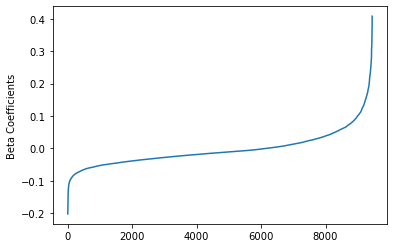

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

### Summary has many components one can call

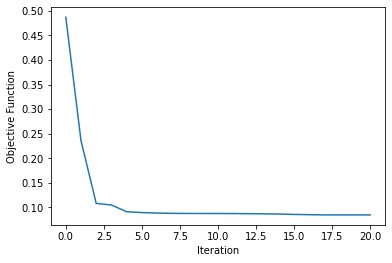

In [21]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

areaUnderROC: 0.9999328621148971


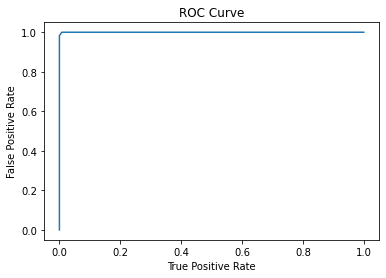

In [22]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

#trainingSummary.roc.show(n=10, truncate=15)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

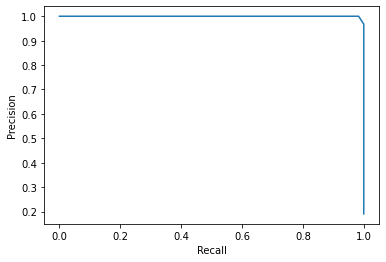

In [23]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

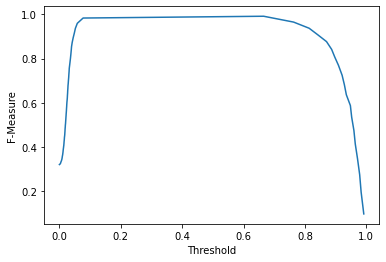

In [24]:
# Set the model threshold to maximize F-Measure
#trainingSummary.fMeasureByThreshold.show(n=10, truncate = 15)
f = trainingSummary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

### Evaluate on test data

In [25]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testData)

predictions.select("text","probability").show(n=10, truncate=40)

+----------------------------------------+----------------------------------------+
|                                    text|                             probability|
+----------------------------------------+----------------------------------------+
|2d metal slug offers retro fun like s...|[0.9803469318748019,0.01965306812519802]|
|abba reunite for musical premiere the...|[0.9833892407473793,0.016610759252620...|
|abortion not a poll issue - blair ton...|[0.02532673336323882,0.9746732666367612]|
|actor scott is new bond favourite boo...|[0.9653418627986485,0.03465813720135152]|
|actress roberts takes spider role act...|[0.9738260633171748,0.02617393668282512]|
|african double in edinburgh world 500...|[0.9699443888068542,0.030055611193145...|
|agassi fear for melbourne andre agass...| [0.950923070701393,0.04907692929860691]|
|ajax refuse to rule out jol move ajax...|[0.9833977870905432,0.016602212909456...|
|all black magic: new zealand rugby pl...|[0.999279735542666,7.2026445733387

#### Prediction object is a dataframe
with some options

In [26]:
predictions.printSchema()

root
 |-- text: string (nullable = true)
 |-- label: integer (nullable = false)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [27]:
predictions.filter(predictions['prediction'] == 1) \
    .select("text","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 20, truncate = 30)

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|mps criticise child access ...|[0.46773439156749774,0.5322...|    1|       1.0|
|tory expert denies defeatis...|[0.4498271321759495,0.55017...|    1|       1.0|
|howard backs stem cell rese...|[0.4467342230015493,0.55326...|    1|       1.0|
|tsunami  won t divert afric...|[0.44654181956068684,0.5534...|    1|       1.0|
|lord scarman  93  dies peac...|[0.43690717588023725,0.5630...|    1|       1.0|
|bid to cut court witness st...|[0.4361055617520705,0.56389...|    1|       1.0|
|councils prepare to set tax...|[0.42443517365763844,0.5755...|    1|       1.0|
|schools to take part in moc...|[0.41824509897096585,0.5817...|    1|       1.0|
|schools to take part in moc...|[0.41824509897096585,0.5817...|    1|       1.0|
|blair hails turkey-eu talks

In [28]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
print("Training: Area Under ROC: " + str(trainingSummary.areaUnderROC))

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Training: Area Under ROC: 0.9999328621148971
Test: Area Under ROC: 0.9977009767092412


### Naive Bayes
#### Specify and fit the model

In [29]:
from pyspark.ml.classification import NaiveBayes

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1, modelType="multinomial")

# train the model
model = nb.fit(trainingData)

#### Evaluate Naive Bayes

As with the regression problem above, now evaluate the classifier.

In [30]:
# select example rows to display.
predictions = model.transform(testData)
predictions.filter(predictions['prediction'] == 1) \
    .select("text","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 20, truncate = 30)

# compute accuracy on the test set
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|row threatens hendrix museu...|[0.37359941745133307,0.6264...|    0|       1.0|
|iraqi voters turn to econom...|[0.2789308911190876,0.72106...|    0|       1.0|
|howard  truanted to play sn...|[0.02276309049154611,0.9772...|    1|       1.0|
|jackson film  absolute disa...|[0.004249643602726778,0.995...|    0|       1.0|
|uk helps raped rwandan wome...|[4.262486800365571E-5,0.999...|    1|       1.0|
|gurkhas to help tsunami vic...|[3.787099464209021E-5,0.999...|    1|       1.0|
|errors  doomed first dome s...|[2.6808207995476074E-7,0.99...|    1|       1.0|
|georgia plans hidden asset ...|[1.0380332960241144E-12,0.9...|    0|       1.0|
|tsunami debt deal to be ann...|[2.01530330148039E-14,0.999...|    1|       1.0|
|short attacks us over tsuna

# Activity: your turn!

### Decision Tree


Using the `DecisionTreeClassifier` imported below, instantiate and fit a classifier with a depth of 3 to the training data.

In [31]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(trainingData)

Great! With a instantiated decision tree model, you can also check the number of nodes and depth of the classifier:

In [33]:
print("numNodes = ", dtModel.numNodes)
print( "depth = ", dtModel.depth)

numNodes =  11
depth =  3


#### Evaluate Decision Tree

Now, evaluate the decision tree classifier you just fit.

In [34]:
## Get predictions for testData
predictions = dtModel.transform(testData)

## Filter predictions where `prediction`==0 to select "text","probability","label","prediction"
# Order by probability and show the top 10 (truncate 30)
predictions.filter(predictions['prediction'] == 0) \
    .select("text","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|imf  cuts  german growth es...|                     [1.0,0.0]|    0|       0.0|
|bmw reveals new models pipe...|[0.9348159509202454,0.06518...|    0|       0.0|
|ailing eurodisney vows turn...|[0.9348159509202454,0.06518...|    0|       0.0|
|aviator and vera take bafta...|[0.9348159509202454,0.06518...|    0|       0.0|
|balco case trial date pushe...|[0.9348159509202454,0.06518...|    0|       0.0|
|bank voted 8-1 for no rate ...|[0.9348159509202454,0.06518...|    0|       0.0|
|bat spit drug firm goes to ...|[0.9348159509202454,0.06518...|    0|       0.0|
|beastie boys win sampling b...|[0.9348159509202454,0.06518...|    0|       0.0|
|beer giant swallows russian...|[0.9348159509202454,0.06518...|    0|       0.0|
|blind student  hears in col

In [35]:
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.6022839969947407


### Random Forest


Let's try one more example. Fit a `RandomForestClassifier` with 100 trees. Each tree should have a maxDepth of 4.

In [36]:
from pyspark.ml.classification import RandomForestClassifier

In [37]:

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

# Train model with Training Data
rfModel = rf.fit(trainingData)

#### Score and evaluate Random Forest

Evaluate the model, as you have with the other models.

In [38]:
## Get predictions for testData
predictions = rfModel.transform(testData)

## Filter predictions where `prediction`==0 to select "text","probability","label","prediction"
# Order by probability and show the top 10 (truncate 30)
predictions.filter(predictions['prediction'] == 1) \
    .select("text","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+------------------------------+-----+----------+
|                          text|                   probability|label|prediction|
+------------------------------+------------------------------+-----+----------+
|tories unveil quango blitz ...|[0.4994472489037254,0.50055...|    1|       1.0|
|boateng to step down at ele...|[0.4983378971112651,0.50166...|    1|       1.0|
|lib dems unveil women s man...|[0.4965466277489323,0.50345...|    1|       1.0|
|tories attack eu asylum mov...|[0.4945002089726476,0.50549...|    1|       1.0|
|lib dems target first-time ...|[0.4898319949147968,0.51016...|    1|       1.0|
|best person  for top legal ...|[0.488520959512027,0.511479...|    1|       1.0|
|what the election should re...|[0.4881795920755938,0.51182...|    1|       1.0|
|opposition grows to house a...|[0.4858349133927025,0.51416...|    1|       1.0|
|blair says mayor should apo...|[0.47965231612524306,0.5203...|    1|       1.0|
|election deal faltered over

In [39]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.9888655146506389


### Implementing grid search with `CrossValidator` in pyspark

In [41]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 200]) # number of trees
             .addGrid(rf.maxDepth, [3, 4, 5]) # maximum depth
#            .addGrid(rf.maxBins, [24, 32, 40]) #Number of bins
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)

# Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

## Which model had the best AUC?

### Learning goals in review. How did we do?
- align the relationships between Hadoop, Spark, and Databricks
- differentiate between Spark RDDs and Spark Dataframes and when each is appropriate
- locate and explore the Spark.ML documentation
- code along a text classification problem using four different ml algorithms, a data prep pipeline, and gridsearch to fine tune a model